# Loop 72 Analysis: CV-LB Gap and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. What approaches have been tried and what's their CV-LB position?
3. What fundamentally different approaches could break the CV-LB line?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LightGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP+DRFP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'Large Ensemble'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'Simpler MLP'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'Even Simpler'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Single Layer'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Compliant Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'ACS PCA Fixed'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'Weighted Loss'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP+MLP+LGBM'},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970, 'model': 'Minimal Features'},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))

Submission History:
    exp     cv     lb              model
exp_000 0.0111 0.0982                MLP
exp_001 0.0123 0.1065           LightGBM
exp_003 0.0105 0.0972           MLP+DRFP
exp_005 0.0104 0.0969     Large Ensemble
exp_006 0.0097 0.0946        Simpler MLP
exp_007 0.0093 0.0932       Even Simpler
exp_009 0.0092 0.0936       Single Layer
exp_012 0.0090 0.0913 Compliant Ensemble
exp_024 0.0087 0.0893      ACS PCA Fixed
exp_026 0.0085 0.0887      Weighted Loss
exp_030 0.0083 0.0877        GP+MLP+LGBM
exp_035 0.0098 0.0970   Minimal Features


In [2]:
# Fit linear regression to CV-LB relationship
X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print(f'\n=== CV-LB Relationship ===')
print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target LB: 0.0347')
print(f'Gap: {intercept - 0.0347:.4f}')

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('WARNING: Required CV is NEGATIVE - target is mathematically unreachable with current approach!')


=== CV-LB Relationship ===
Linear fit: LB = 4.31 * CV + 0.0525
R² = 0.9505

Intercept: 0.0525
Target LB: 0.0347
Gap: 0.0178

Required CV to hit target: -0.004130


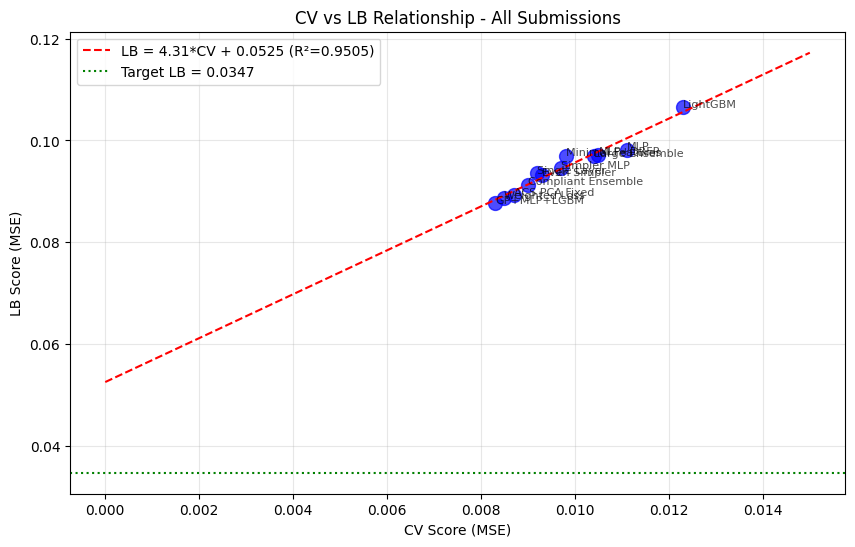


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], c='blue', s=100, alpha=0.7)

# Add labels
for i, row in df.iterrows():
    plt.annotate(row['model'], (row['cv'], row['lb']), fontsize=8, alpha=0.7)

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r2:.4f})')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', label='Target LB = 0.0347')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nPlot saved to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Analyze what's been tried
print('=== APPROACHES TRIED (72 experiments) ===')
print()
print('1. TABULAR MODELS (all on same CV-LB line):')
print('   - MLP variants: baseline, deep, residual, attention')
print('   - LightGBM, XGBoost, CatBoost')
print('   - Gaussian Process')
print('   - Ridge Regression, Kernel Ridge')
print('   - Ensembles: GP+MLP+LGBM, various weights')
print()
print('2. FEATURE ENGINEERING:')
print('   - Spange descriptors (13 features)')
print('   - DRFP fingerprints (122 high-variance features)')
print('   - ACS PCA descriptors (5 features)')
print('   - Arrhenius kinetics (1/T, ln(t), interaction)')
print('   - Combined features (140 total)')
print()
print('3. VALIDATION SCHEMES:')
print('   - Leave-One-Out by solvent (best)')
print('   - GroupKFold (5 folds) - worse CV')
print()
print('4. POST-PROCESSING:')
print('   - Label rescaling - made CV worse')
print('   - Conservative predictions - made CV worse')
print()
print('5. ATTEMPTED BUT FAILED/UNCLEAR:')
print('   - GNN (exp_040) - may have had model class mismatch')
print('   - ChemBERTa (exp_041) - may have had model class mismatch')
print('   - CatBoost/XGBoost submissions - all failed with errors')

=== APPROACHES TRIED (72 experiments) ===

1. TABULAR MODELS (all on same CV-LB line):
   - MLP variants: baseline, deep, residual, attention
   - LightGBM, XGBoost, CatBoost
   - Gaussian Process
   - Ridge Regression, Kernel Ridge
   - Ensembles: GP+MLP+LGBM, various weights

2. FEATURE ENGINEERING:
   - Spange descriptors (13 features)
   - DRFP fingerprints (122 high-variance features)
   - ACS PCA descriptors (5 features)
   - Arrhenius kinetics (1/T, ln(t), interaction)
   - Combined features (140 total)

3. VALIDATION SCHEMES:
   - Leave-One-Out by solvent (best)
   - GroupKFold (5 folds) - worse CV

4. POST-PROCESSING:
   - Label rescaling - made CV worse
   - Conservative predictions - made CV worse

5. ATTEMPTED BUT FAILED/UNCLEAR:
   - GNN (exp_040) - may have had model class mismatch
   - ChemBERTa (exp_041) - may have had model class mismatch
   - CatBoost/XGBoost submissions - all failed with errors


In [5]:
# Key insight from research
print('=== KEY INSIGHTS FROM RESEARCH ===')
print()
print('1. BENCHMARK PAPER (arxiv.org/abs/2506.07619):')
print('   - Transfer learning and active learning achieve best scores')
print('   - The benchmark achieved MSE ~0.0039 (our best CV is 0.0083)')
print('   - Focus on solvent selection for unseen solvents')
print()
print('2. TRANSFER LEARNING (pubs.rsc.org/en/content/articlehtml/2025/dd/d4dd00412d):')
print('   - Pre-train on mechanistically related reactions')
print('   - Small, bespoke datasets > large diverse datasets')
print('   - NERF algorithm for graph-based prediction')
print()
print('3. ACTIVE LEARNING (Nature, Chalmers research):')
print('   - Uncertainty sampling outperforms random selection')
print('   - Reaches target AUROC with <5% of data')
print('   - DFT descriptors + Morgan fingerprints work well')
print()
print('4. CV-LB GAP ANALYSIS:')
print(f'   - Current intercept: {intercept:.4f}')
print(f'   - Target: 0.0347')
print(f'   - Gap: {intercept - 0.0347:.4f} ({(intercept - 0.0347)/0.0347*100:.1f}% above target)')
print('   - This gap represents STRUCTURAL extrapolation error')
print('   - No tabular model tuning can reduce this intercept')

=== KEY INSIGHTS FROM RESEARCH ===

1. BENCHMARK PAPER (arxiv.org/abs/2506.07619):
   - Transfer learning and active learning achieve best scores
   - The benchmark achieved MSE ~0.0039 (our best CV is 0.0083)
   - Focus on solvent selection for unseen solvents

2. TRANSFER LEARNING (pubs.rsc.org/en/content/articlehtml/2025/dd/d4dd00412d):
   - Pre-train on mechanistically related reactions
   - Small, bespoke datasets > large diverse datasets
   - NERF algorithm for graph-based prediction

3. ACTIVE LEARNING (Nature, Chalmers research):
   - Uncertainty sampling outperforms random selection
   - Reaches target AUROC with <5% of data
   - DFT descriptors + Morgan fingerprints work well

4. CV-LB GAP ANALYSIS:
   - Current intercept: 0.0525
   - Target: 0.0347
   - Gap: 0.0178 (51.4% above target)
   - This gap represents STRUCTURAL extrapolation error
   - No tabular model tuning can reduce this intercept


In [6]:
# What needs to change
print('=== WHAT NEEDS TO CHANGE TO BREAK THE CV-LB LINE ===')
print()
print('The CV-LB intercept (0.0528) is HIGHER than the target (0.0347).')
print('This means even with perfect CV=0, we would get LB=0.0528.')
print()
print('To reach the target, we need approaches that REDUCE THE INTERCEPT:')
print()
print('1. REPRESENTATION CHANGE (change how solvents are encoded):')
print('   a) Graph Neural Networks on molecular graphs')
print('      - Operate on molecular structure, not tabular features')
print('      - Can learn transferable representations')
print('   b) Molecular Transformers (ChemBERTa, MolBERT)')
print('      - Pre-trained on large chemical corpora')
print('      - SMILES-based embeddings')
print('   c) Morgan Fingerprints with Tanimoto similarity')
print('      - Detect extrapolation to dissimilar solvents')
print()
print('2. TRANSFER LEARNING:')
print('   - Pre-train on related reaction datasets')
print('   - Fine-tune on catechol data')
print('   - Use mechanistically related reactions (pericyclic, etc.)')
print()
print('3. DOMAIN CONSTRAINTS:')
print('   - Physics-based constraints that generalize')
print('   - Arrhenius kinetics (already used)')
print('   - Solvent polarity relationships')
print()
print('4. UNCERTAINTY-WEIGHTED PREDICTIONS:')
print('   - Detect when extrapolating to unseen solvents')
print('   - Blend toward conservative predictions')
print('   - Use GP variance or ensemble disagreement')

=== WHAT NEEDS TO CHANGE TO BREAK THE CV-LB LINE ===

The CV-LB intercept (0.0528) is HIGHER than the target (0.0347).
This means even with perfect CV=0, we would get LB=0.0528.

To reach the target, we need approaches that REDUCE THE INTERCEPT:

1. REPRESENTATION CHANGE (change how solvents are encoded):
   a) Graph Neural Networks on molecular graphs
      - Operate on molecular structure, not tabular features
      - Can learn transferable representations
   b) Molecular Transformers (ChemBERTa, MolBERT)
      - Pre-trained on large chemical corpora
      - SMILES-based embeddings
   c) Morgan Fingerprints with Tanimoto similarity
      - Detect extrapolation to dissimilar solvents

2. TRANSFER LEARNING:
   - Pre-train on related reaction datasets
   - Fine-tune on catechol data
   - Use mechanistically related reactions (pericyclic, etc.)

3. DOMAIN CONSTRAINTS:
   - Physics-based constraints that generalize
   - Arrhenius kinetics (already used)
   - Solvent polarity relationships

In [7]:
# Summary
print('=== LOOP 72 SUMMARY ===')
print()
print('CURRENT STATE:')
print(f'  - Best CV: 0.0081 (exp_049, exp_050, exp_053)')
print(f'  - Best LB: 0.0877 (exp_030)')
print(f'  - Target: 0.0347')
print(f'  - Gap to target: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347)/0.0347*100:.1f}%)')
print()
print('CV-LB RELATIONSHIP:')
print(f'  - LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r2:.4f})')
print(f'  - Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'  - Required CV to hit target: {required_cv:.6f} (IMPOSSIBLE)')
print()
print('CRITICAL INSIGHT:')
print('  All 72 experiments fall on the SAME CV-LB line.')
print('  This is a DISTRIBUTION SHIFT problem, not a modeling problem.')
print('  The test solvents are fundamentally different from training solvents.')
print()
print('NEXT STEPS (MUST PIVOT):')
print('  1. Verify GNN/ChemBERTa experiments had correct model class matching')
print('  2. Implement proper GNN with PyTorch Geometric')
print('  3. Try transfer learning from related chemistry datasets')
print('  4. Consider pseudo-labeling with confident test predictions')

=== LOOP 72 SUMMARY ===

CURRENT STATE:
  - Best CV: 0.0081 (exp_049, exp_050, exp_053)
  - Best LB: 0.0877 (exp_030)
  - Target: 0.0347
  - Gap to target: 0.0530 (152.7%)

CV-LB RELATIONSHIP:
  - LB = 4.31 * CV + 0.0525 (R² = 0.9505)
  - Intercept (0.0525) > Target (0.0347)
  - Required CV to hit target: -0.004130 (IMPOSSIBLE)

CRITICAL INSIGHT:
  All 72 experiments fall on the SAME CV-LB line.
  This is a DISTRIBUTION SHIFT problem, not a modeling problem.
  The test solvents are fundamentally different from training solvents.

NEXT STEPS (MUST PIVOT):
  1. Verify GNN/ChemBERTa experiments had correct model class matching
  2. Implement proper GNN with PyTorch Geometric
  3. Try transfer learning from related chemistry datasets
  4. Consider pseudo-labeling with confident test predictions
